In [1]:

import pandas as pd

# Load the CSV data
try:
  df = pd.read_csv('DATA_1.csv')
except FileNotFoundError:
  print("File 'DATA_1.csv' not found. Please upload the file to the Colab environment.")
  exit()

# Split the string column into multiple columns
df_split = df['        date          ,    lat   ,    lon   , smajax , sminax , strike, q ,  depth ,   unc , q ,  mw  ,  unc , q , s ,   mo  , fac,  mo_auth ,  mpp  ,  mpr  ,  mrr  ,  mrt  ,  mtp  ,  mtt  ,  str1  ,  dip1  , rake1  ,  str2  ,  dip2  , rake2  ,   type ,    eventid'].str.split(',', expand=True)

# Remove leading/trailing whitespace from column values
df_split = df_split.apply(lambda x: x.str.strip())

# Define column names
column_names = [
    "date", "lat", "lon", "smajax", "sminax", "strike", "q1", "depth", "unc1",
    "q2", "mw", "unc2", "q3", "s", "mo", "fac", "mo_auth", "mpp", "mpr", "mrr",
    "mrt", "mtp", "mtt", "str1", "dip1", "rake1", "str2", "dip2", "rake2", "type", "eventid"
]

# Assign column names to the dataframe
df_split.columns = column_names

# Convert 'lat' and 'lon' to numeric, handling errors
df_split['lat'] = pd.to_numeric(df_split['lat'], errors='coerce')
df_split['lon'] = pd.to_numeric(df_split['lon'], errors='coerce')

# Drop rows where 'lat' or 'lon' are NaN
df_split.dropna(subset=['lat', 'lon'], inplace=True)

In [6]:
df_split


,date,lat,lon,smajax,sminax,strike,q1,depth,unc1,q2,...,mtp,mtt,str1,dip1,rake1,str2,dip2,rake2,type,eventid
0,1904-04-04 10:02:34.56,41.802,23.108,8.6,6.6,164.2,B,15.0,4.8,C,...,,,,,,,,,,610326271
1,1904-04-04 10:26:00.88,41.758,23.249,8.3,6.9,15.2,B,15.0,4.8,C,...,,,,,,,,,,16957813
2,1904-06-25 14:45:39.14,51.424,161.638,33.6,18.7,116.2,C,15.0,25.0,C,...,,,,,,,,,,16957820
3,1904-06-25 21:00:38.72,52.763,160.277,28.6,14.6,43.1,C,30.0,10.3,C,...,,,,,,,,,,16957819
4,1904-08-30 11:43:20.85,30.684,100.608,16.9,14.4,118.4,C,15.0,25.0,C,...,,,,,,,,,,16957826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70876,2020-12-29 23:34:57.48,-0.856,-21.097,6.2,4.3,139.8,A,10.6,3.7,A,...,-8.02,2.42,83.0,85.0,169.0,174.0,79.0,5.0,BDC,619628341
70877,2020-12-30 00:35:28.18,36.519,140.569,5.1,4.0,108.5,A,53.3,5.2,A,...,-0.25,-0.08,18.0,58.0,89.0,200.0,32.0,92.0,BDC,624898195
70878,2020-12-31 10:18:54.45,-8.733,122.233,5.4,4.1,62.8,A,130.8,6.0,A,...,-5.45,3.34,165.0,42.0,-17.0,268.0,79.0,-130.0,BDC,619630527
70879,2020-12-31 19:50:17.87,-0.793,146.809,6.5,4.7,62.8,A,14.4,3.7,A,...,0.39,-4.07,90.0,18.0,78.0,283.0,73.0,94.0,BDC,619630706


# DONT RUN THE BELOW CELL UNTIL AND UNLESS ITS IMPORTANT

In [4]:
import json
import pandas as pd
import plotly.graph_objects as go

with open('PB2002_boundaries.json') as f:
    plate_boundaries = json.load(f)

df_split['mw'] = pd.to_numeric(df_split['mw'], errors='coerce')

# For the earthquake scatter plot
fig = go.Figure(go.Scattergeo(
    lon=df_split['lon'],
    lat=df_split['lat'],
    text=[f"Magnitude: {mw:.2f}<br>Lat: {lat:.2f}<br>Lon: {lon:.2f}" 
          for lat, lon, mw in zip(df_split['lat'], df_split['lon'], df_split['mw'])],
    mode='markers',
    showlegend=False,  # Add this line
    marker=dict(
        size=df_split['mw'],
        opacity=0.8,
        color=df_split['mw'],
        colorscale='Viridis',
        colorbar=dict(title='Magnitude')
    )
))

# For the plate boundaries
for feature in plate_boundaries['features']:
    coords = feature['geometry']['coordinates']
    lons, lats = zip(*coords)
    fig.add_trace(go.Scattergeo(
        lon=lons,
        lat=lats,
        mode='lines',
        showlegend=False,  # Add this line
        line=dict(color='black', width=2),
    ))


# Customize the layout
fig.update_layout(
    title='Earthquake Locations by Magnitude',
    geo=dict(
        showland=True,
        landcolor="LightGreen",
        showocean=True,
        oceancolor="LightBlue",
        projection_type="natural earth"
    )
)

fig.show()



C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.13_3.13.752.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 556, in run
    wit

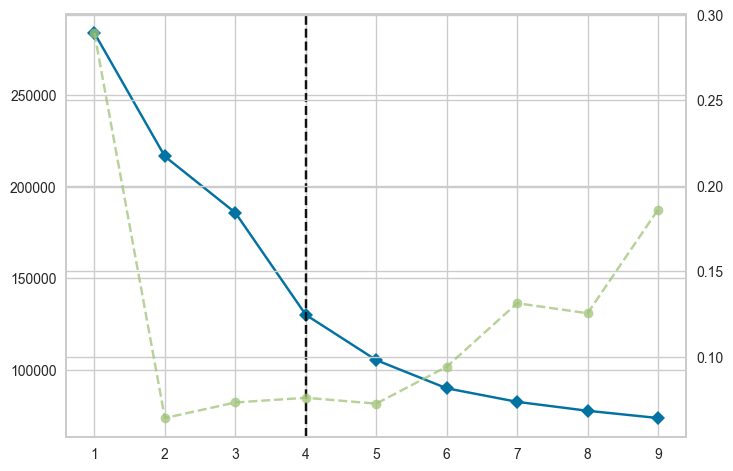

In [5]:
import yellowbrick
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

# First standardize the features since they're on different scales
X = df_split[['lat', 'lon', 'mw', 'depth']]
scaler = StandardScaler()
df_split['depth'] = pd.to_numeric(df_split['depth'], errors='coerce')
df_split['mw'] = pd.to_numeric(df_split['mw'], errors='coerce')
X_scaled = scaler.fit_transform(X)

# Use Elbow Method to find optimal k
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(X_scaled)
optimal_k = visualizer.elbow_value_

# Now perform clustering with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_split['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters on the map


In [ ]:
df_split["cluster"].unique()

In [6]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure(go.Scattergeo(
    lon=df_split['lon'],
    lat=df_split['lat'],
    text=[f"Magnitude: {mw:.2f}<br>Depth: {depth:.2f}<br>Cluster: {cluster}" 
          for mw, depth, cluster in zip(df_split['mw'], df_split['depth'], df_split['cluster'])],
    mode='markers',
    marker=dict(
        size=df_split['mw'],
        opacity=0.8,
        color=df_split['cluster'],
        colorscale='Viridis',
        colorbar=dict(title='Cluster')
    )
))

fig.update_layout(
    title='Earthquake Clusters',
    showlegend=False,
    geo=dict(
        showland=True,
        landcolor="LightGreen",
        showocean=True,
        oceancolor="LightBlue",
        projection_type="natural earth"
    )
)

fig.show()

In [7]:
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import numpy as np

# Prepare the data
X = df_split[['lat', 'lon', 'mw', 'depth']]
X_scaled = StandardScaler().fit_transform(X)

# 1. DBSCAN Clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
df_split['dbscan_cluster'] = dbscan.fit_predict(X_scaled)

# Visualize DBSCAN results
fig_dbscan = go.Figure(go.Scattergeo(
    lon=df_split['lon'],
    lat=df_split['lat'],
    text=[f"Magnitude: {float(mw):.2f}<br>Depth: {float(depth):.2f}<br>Cluster: {cluster}" 
          if pd.notnull(mw) and pd.notnull(depth)
          else f"Magnitude: N/A<br>Depth: N/A<br>Cluster: {cluster}"
          for mw, depth, cluster in zip(df_split['mw'], df_split['depth'], df_split['dbscan_cluster'])],
    mode='markers',
    marker=dict(
        size=df_split['mw'],
        opacity=0.8,
        color=df_split['dbscan_cluster'],
        colorscale='Viridis',
        colorbar=dict(title='DBSCAN Cluster')
    )
))

fig_dbscan.update_layout(
    title='Earthquake Clusters (DBSCAN)',
    showlegend=False,
    geo=dict(
        showland=True,
        landcolor="LightGreen",
        showocean=True,
        oceancolor="LightBlue",
        projection_type="natural earth"
    )
)


In [8]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=5, random_state=42)
df_split['gmm_cluster'] = gmm.fit_predict(X_scaled)

# Visualize GMM results
fig_gmm = go.Figure(go.Scattergeo(
    lon=df_split['lon'],
    lat=df_split['lat'],
    text=[f"Magnitude: {float(mw):.2f}<br>Depth: {float(depth):.2f}<br>Cluster: {cluster}" 
          if pd.notnull(mw) and pd.notnull(depth)
          else f"Magnitude: N/A<br>Depth: N/A<br>Cluster: {cluster}"
          for mw, depth, cluster in zip(df_split['mw'], df_split['depth'], df_split['gmm_cluster'])],
    mode='markers',
    marker=dict(
        size=df_split['mw'],
        opacity=0.8,
        color=df_split['gmm_cluster'],
        colorscale='Viridis',
        colorbar=dict(title='GMM Cluster')
    )
))

fig_gmm.update_layout(
    title='Earthquake Clusters (Gaussian Mixture)',
    showlegend=False,
    geo=dict(
        showland=True,
        landcolor="LightGreen",
        showocean=True,
        oceancolor="LightBlue",
        projection_type="natural earth"
    )
)

# Display both plots
fig_gmm.show()

In [9]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
def evaluate_clustering(df, cluster_columns):
    evaluation_results = {}
    features = df[['lat', 'lon', 'mw']]
    
    for method, col in cluster_columns.items():
        labels = df[col]
        if len(set(labels)) > 1:  # Ensure valid clusters exist
            silhouette = silhouette_score(features, labels)
            davies_bouldin = davies_bouldin_score(features, labels)
            evaluation_results[method] = {
                'Silhouette Score': silhouette,
                'Davies-Bouldin Index': davies_bouldin,
            }
    
    return evaluation_results

In [10]:
cluster_methods = {
    'KMeans': 'cluster',
    'DBSCAN': 'dbscan_cluster',
    'GaussianMixture': 'gmm_cluster'
}

# Evaluate clustering
evaluation_scores = evaluate_clustering(df_split, cluster_methods)
print(evaluation_scores)

{'KMeans': {'Silhouette Score': np.float64(0.42275035140144135), 'Davies-Bouldin Index': np.float64(3.1708609105766095)}, 'DBSCAN': {'Silhouette Score': np.float64(-0.8755076608362657), 'Davies-Bouldin Index': np.float64(5.811506656501335)}, 'GaussianMixture': {'Silhouette Score': np.float64(-0.027202190686604504), 'Davies-Bouldin Index': np.float64(6.217332845579802)}}


In [11]:
scores_df = pd.DataFrame(evaluation_scores)

In [12]:
scores_df

,KMeans,DBSCAN,GaussianMixture
Silhouette Score,0.422750,-0.875508,-0.027202
Davies-Bouldin Index,3.170861,5.811507,6.217333
